读取数据

In [1]:
from utils import *
from Analyzer.VolumeAnalyzer import VolumeAnalyzer
from Analyzer.VolumeAnalyzer import Columns
import OriginalData
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


data = OriginalData.OriginalData.batch_read()
data = VolumeAnalyzer.process_outpatient_detail(data)

In [18]:
age_bins = list(range(20, 100, 10))
age_cuts = pd.cut(data['AGE'], bins=age_bins, right=False)
class_cols = [Columns.Date, Columns.Sex, age_cuts]

vol = VolumeAnalyzer.get_outpatient_volume(data, class_cols)
vol['SEX'] = vol['SEX'].apply(lambda x: '男' if x == 'Male' else '女')
# vol.to_csv('./results/age_sex_volume.csv')
print(vol.columns)

Index(['VISIT_DATE', 'SEX', 'AGE', 'VOLUME'], dtype='object')


In [ ]:
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style='white')

g = sns.boxplot(x=Columns.Age,
            y=Columns.OutpatientVol,
            hue=Columns.Sex,
            data=vol,
            )
plt.xticks(rotation=45)
plt.show()
g.get_figure().savefig('boxplot_volumn_age_sex.png', dpi=600, bbox_inches = 'tight')

g = sns.violinplot(x=Columns.Age,
            y=Columns.OutpatientVol,
            hue=Columns.Sex,
            data=vol,
            split=True)

plt.xticks(rotation=45)
plt.show()
g.get_figure().savefig('violinplot_volumn_age_sex.png', dpi=600, bbox_inches = 'tight')

上述绘图的统计值

In [15]:
import numpy as np

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_
result = vol.groupby(['AGE', 'SEX'])['VOLUME'].agg(
    [np.mean, percentile(25), np.median, percentile(75), np.std, np.min, np.max])
result = result.reset_index()
result

,AGE,SEX,mean,percentile_25,median,percentile_75,std,amin,amax
0,"[20, 30)",女,14.948315,10,15,20,6.881417,1,36
1,"[20, 30)",男,15.663300,10,16,21,7.549759,1,38
2,"[30, 40)",女,13.691789,8,14,18,6.645932,1,34
3,"[30, 40)",男,10.365688,6,10,14,5.237578,1,31
4,"[40, 50)",女,14.140607,9,15,19,6.826636,1,38
5,"[40, 50)",男,8.143828,5,8,11,4.361335,1,28
6,"[50, 60)",女,13.005643,8,13,18,6.446036,1,33
7,"[50, 60)",男,5.902665,3,6,8,3.199809,1,21
8,"[60, 70)",女,7.921502,4,8,11,4.398641,1,24
9,"[60, 70)",男,3.922612,2,4,5,2.253071,1,13


查看不同年龄的人在一周中，是否有看病喜好的差异：


In [13]:
age_bins = list(range(20, 100, 10))
age_cuts = pd.cut(data['AGE'], bins=age_bins, right=False)
class_cols = [Columns.Date, Columns.Week, age_cuts]

vol = VolumeAnalyzer.get_outpatient_volume(data, class_cols)
print(vol.columns)

Index(['VISIT_DATE', 'WEEK', 'AGE', 'VOLUME'], dtype='object')


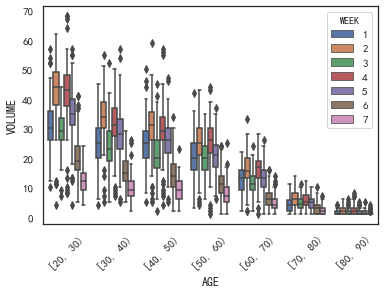

In [16]:

myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style='white')

g = sns.boxplot(x=Columns.Age,
            y=Columns.OutpatientVol,
            hue=Columns.Week,
            data=vol,
            )
plt.xticks(rotation=45)
plt.show()
g.get_figure().savefig('./results/violinplot_age_week_volume.png', dpi=600, bbox_inches = 'tight')

查看不同性别的人，在一周之中是否有看病的喜好差异

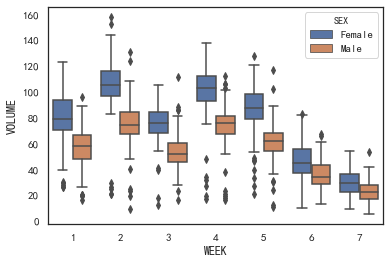

In [17]:
class_cols = [Columns.Date, Columns.Week, Columns.Sex]

vol = VolumeAnalyzer.get_outpatient_volume(data, class_cols)



myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style='white')

g = sns.boxplot(x=Columns.Week,
            y=Columns.OutpatientVol,
            hue=Columns.Sex,
            data=vol,
            )
# plt.xticks(rotation=45)
plt.show()
g.get_figure().savefig('./results/violinplot_week_sex_volume.png', dpi=600, bbox_inches = 'tight')


看看门诊量与假期长度是否有关

In [2]:
class_cols = [Columns.Date, Columns.Dist_pre_hld, Columns.Sex]
vol = VolumeAnalyzer.get_outpatient_volume(data, class_cols)

myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style='white')

g = sns.boxplot(x=Columns.Week,
            y=Columns.OutpatientVol,
            hue=Columns.Sex,
            data=vol,
            )
# plt.xticks(rotation=45)
plt.show()
# g.get_figure().savefig('./results/violinplot_week_sex_volume.png', dpi=600, bbox_inches = 'tight')


KeyError: 'SEX'

In [12]:
df1 = pd.DataFrame({
    'date': [1,2,3,4, 1,2,3,4],
    'value':[4,3,2,1, 5,6,7,8]
})
df2 = pd.DataFrame({
    'date':[1,2,3,4,5,6],
    'test':[2,3,4,5,6,7]
})
pd.merge(df1, df2, on=['date'])

,date,value,test
0,1,4,2
1,1,5,2
2,2,3,3
3,2,6,3
4,3,2,4
5,3,7,4
6,4,1,5
7,4,8,5
